In [23]:
from keras.datasets import imdb
import numpy as np
max_features = 10000 #出現頻率較高的前一萬字
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)


In [24]:
print(type(x_train))
print(x_train.shape)
print(x_train[0])
print(y_train[0])


<class 'numpy.ndarray'>
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [25]:
#imdb內建字典wordindex
word_index=imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [26]:
#sequence長度調整(長度一樣:不足補0多的刪除)
from keras.preprocessing.sequence import sequence
maxlen=500
x_train=sequence.pad_sequences(x_train,maxlen=maxlen)
x_test=sequence.pad_sequences(x_test,maxlen=maxlen)

print(x_train.shape)

(25000, 500)


In [33]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,SimpleRNN,Embedding

model=Sequential()
model.add(Embedding(max_features,output_dim=32)) #降低維度(10000->32)

# model.add(SimpleRNN(32))
# model.add(Dense(1, activation='sigmoid'))
# model.summary()

# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.add(SimpleRNN(32))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               4224      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 326,433
Trainable params: 326,433
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=10)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 87s 3ms/step - loss: 0.5590 - acc: 0.6953 - val_loss: 0.4945 - val_acc: 0.7588
Epoch 2/10
25000/25000 [==============================] - 90s 4ms/step - loss: 0.3683 - acc: 0.8414 - val_loss: 0.5439 - val_acc: 0.7183
Epoch 3/10
25000/25000 [==============================] - 85s 3ms/step - loss: 0.2306 - acc: 0.9106 - val_loss: 0.4382 - val_acc: 0.8203
Epoch 4/10
25000/25000 [==============================] - 81s 3ms/step - loss: 0.0993 - acc: 0.9656 - val_loss: 0.5813 - val_acc: 0.8008
Epoch 5/10
25000/25000 [==============================] - 80s 3ms/step - loss: 0.0499 - acc: 0.9834 - val_loss: 0.7844 - val_acc: 0.8233
Epoch 6/10
25000/25000 [==============================] - 81s 3ms/step - loss: 0.0457 - acc: 0.9834 - val_loss: 0.9249 - val_acc: 0.8091
Epoch 7/10
25000/25000 [==============================] - 82s 3ms/step - loss: 0.0440 - acc: 0.9852 - val_loss: 0.9322 - val_acc

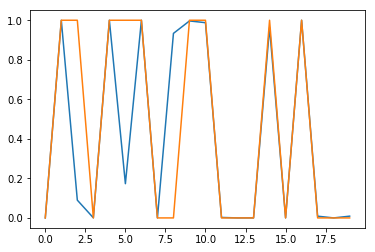

In [36]:
import matplotlib.pyplot as plt
plt.plot(model.predict(x_test[:20]))
plt.plot(y_test[:20])
plt.show()